# Simulated Datasets

In [1]:
import pandas
from os import listdir, getcwd
from os.path import isfile, join
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 

In [2]:
path = join(getcwd())

In [3]:
files = [f for f in listdir(path) if isfile(join(path, f)) and '.csv' in f]
files

['defl_k0.5_T100_DFS2.csv',
 'pos_k0.5_T300_DFS2.csv',
 'defl_k0.5_T1000_DFS2.csv',
 'defl_k0.5_T300_DFS2.csv',
 'pos_k0.5_T1000_DFS2.csv',
 'pos_k0.5_T100_DFS2.csv']

In [4]:
data_list = {}
for f in files:
    data_list[f] = pandas.read_csv(f,header=None)
    print(data_list[f].columns)

Int64Index([0], dtype='int64')
Int64Index([0], dtype='int64')
Int64Index([0], dtype='int64')
Int64Index([0], dtype='int64')
Int64Index([0], dtype='int64')
Int64Index([0], dtype='int64')


In [5]:
deflection_curve = []
position_curve = []
for k in data_list:
    if 'defl' in k:
        data_list[k].rename(columns={0:'deflection'}, inplace=True)
        deflection_curve.append(data_list[k])
    else:
        data_list[k].rename(columns={0:'position'}, inplace=True)
        position_curve.append(data_list[k])

**T=100 Curve**

Text(0, 0.5, 'Z position')

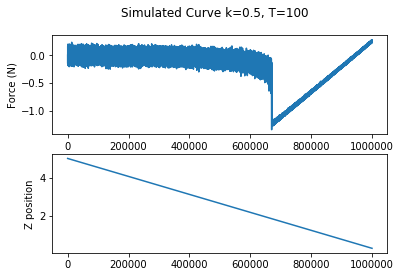

In [6]:
plt.figure(1)
plt.suptitle('Simulated Curve k=0.5, T=100')
plt.subplot(211)
plt.plot(deflection_curve[0])
plt.ylabel('Force (N)')
plt.subplot(212)
plt.plot(position_curve[2])
plt.ylabel('Z position')

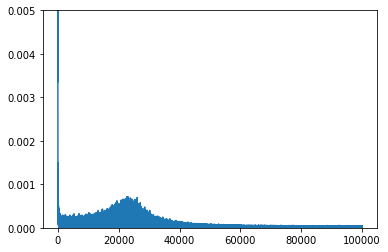

In [18]:
# Number of sample points
import numpy as np
d = deflection_curve[0].iloc[:,0]
N = d.shape[0]
# sample spacing
T = 5e-6
x = np.linspace(0.0, N*T, N)
y = d[:N]
yf = np.fft.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.ylim(0,5e-3)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))

In [11]:
type(d)

pandas.core.frame.DataFrame

In [35]:
X = pandas.concat([deflection_curve[0], position_curve[2]], axis=1).values
scaler = StandardScaler()  
scaler.fit_transform(X)  

array([[ 0.60294114,  1.73205252],
       [ 0.50136182,  1.73205252],
       [ 0.41265929,  1.73205252],
       ...,
       [ 1.34008009, -1.73204519],
       [ 1.36361084, -1.73204519],
       [ 1.37390554, -1.73205256]])

In [27]:
inertia_scores = []
for i in range(1,10):
    Xk = X[:]
    km = KMeans(i, random_state=10)
    km.fit_transform(Xk)
    labels = km.predict(Xk)
    inertia_scores.append(km.inertia_)

Elbow Method

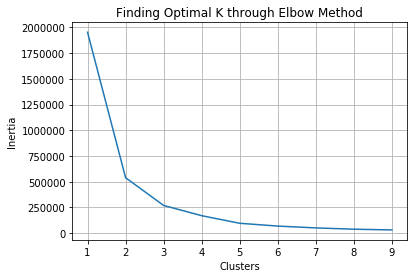

In [9]:
plt.plot(range(1,10),inertia_scores)
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.title("Finding Optimal K through Elbow Method")
plt.grid(True)

Gap Statistic

In [10]:
import numpy as np
from gap_statistic import OptimalK
optimalK = OptimalK(parallel_backend='multiprocessing')
n_clusters = optimalK(X, cluster_array=np.arange(1, 10))

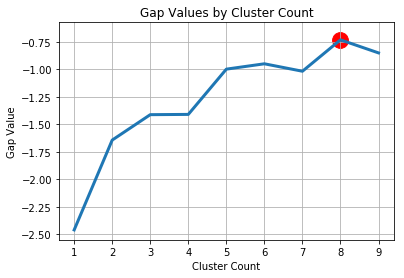

In [11]:
plt.plot(optimalK.gap_df.n_clusters, optimalK.gap_df.gap_value, linewidth=3)
plt.scatter(optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].n_clusters,
            optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].gap_value, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

In [36]:
Xk = X[:]
km = KMeans(3)
labels = km.fit_predict(Xk)

Text(0,0.5,'Z position')

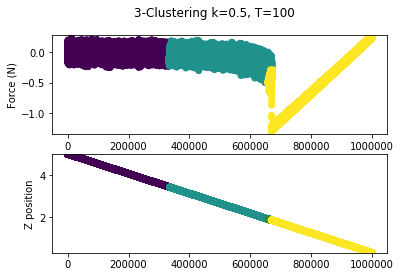

In [37]:
plt.figure(1)
plt.suptitle('3-Clustering k=0.5, T=100')
plt.subplot(211)
plt.scatter(range(Xk.shape[0]), Xk[:,0], c=labels)
plt.ylim(min(Xk[:,0]),max(Xk[:,0]))
plt.ylabel('Force (N)')
plt.subplot(212)
plt.scatter(range(Xk.shape[0]), Xk[:,1], c=labels)
plt.ylim(min(Xk[:,1]),max(Xk[:,1]))
plt.ylabel('Z position')

**T=300K Curve**

In [ ]:
plt.figure(1)
plt.suptitle('Simulated Curve k=0.5, T=300')
plt.subplot(211)
plt.plot(deflection_curve[2])
plt.ylabel('Force (N)')
plt.subplot(212)
plt.plot(position_curve[0])
plt.ylabel('Z position')

In [ ]:
X = pandas.concat([deflection_curve[2], position_curve[0]], axis=1).values
scaler = StandardScaler()  
scaler.fit_transform(X)  

In [ ]:
inertia_scores = []
for i in range(1,10):
    Xk = X[:]
    km = KMeans(i, random_state=10)
    km.fit_transform(Xk)
    labels = km.predict(Xk)
    inertia_scores.append(km.inertia_)

Elbow Method

In [ ]:
plt.plot(range(1,10),inertia_scores)
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.title("Finding Optimal K through Elbow Method")
plt.grid(True)

Gap Statistic

In [16]:
import numpy as np
from gap_statistic import OptimalK
optimalK = OptimalK(parallel_backend='multiprocessing')
n_clusters = optimalK(X, cluster_array=np.arange(1, 10))

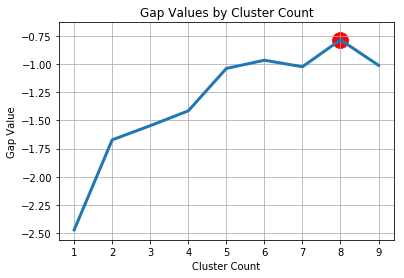

In [17]:
plt.plot(optimalK.gap_df.n_clusters, optimalK.gap_df.gap_value, linewidth=3)
plt.scatter(optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].n_clusters,
            optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].gap_value, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

In [39]:
Xk = X[:]
km = KMeans(3)
labels = km.fit_predict(Xk)

Text(0,0.5,'Z position')

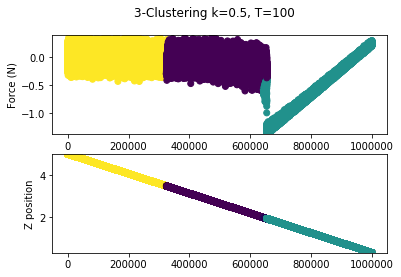

In [40]:
plt.figure(1)
plt.suptitle('3-Clustering k=0.5, T=100')
plt.subplot(211)
plt.scatter(range(Xk.shape[0]), Xk[:,0], c=labels)
plt.ylim(min(Xk[:,0]),max(Xk[:,0]))
plt.ylabel('Force (N)')
plt.subplot(212)
plt.scatter(range(Xk.shape[0]), Xk[:,1], c=labels)
plt.ylim(min(Xk[:,1]),max(Xk[:,1]))
plt.ylabel('Z position')

**T=1000K Curve**

Text(0, 0.5, 'Z position')

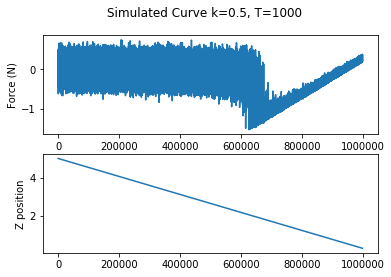

In [6]:
plt.figure(1)
plt.suptitle('Simulated Curve k=0.5, T=1000')
plt.subplot(211)
plt.plot(deflection_curve[1])
plt.ylabel('Force (N)')
plt.subplot(212)
plt.plot(position_curve[1])
plt.ylabel('Z position')

In [11]:
X = pandas.concat([deflection_curve[1], position_curve[1]], axis=1).values
scaler = StandardScaler()  
scaler.fit_transform(X)  

array([[ 0.54668349,  1.73205252],
       [ 0.4849339 ,  1.73205252],
       [ 0.52936004,  1.73205252],
       ...,
       [ 1.35819203, -1.73204519],
       [ 1.25135359, -1.73204519],
       [ 1.12516327, -1.73205256]])

In [22]:
inertia_scores = []
for i in range(1,10):
    Xk = X[:]
    km = KMeans(i, random_state=10)
    km.fit_transform(Xk)
    labels = km.predict(Xk)
    inertia_scores.append(km.inertia_)

Elbow Method

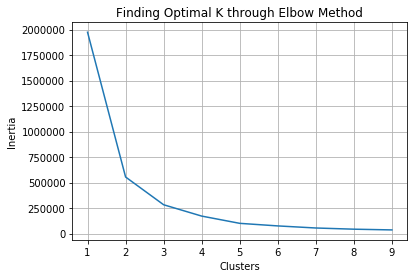

In [23]:
plt.plot(range(1,10),inertia_scores)
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.title("Finding Optimal K through Elbow Method")
plt.grid(True)

Gap Statistic

In [24]:
optimalK = OptimalK(parallel_backend='multiprocessing')
n_clusters = optimalK(X, cluster_array=np.arange(1, 10))

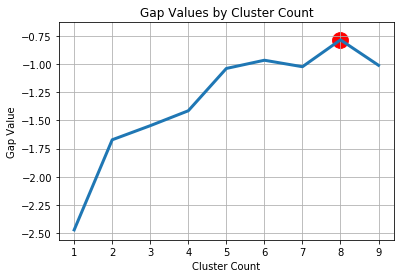

In [25]:
plt.plot(optimalK.gap_df.n_clusters, optimalK.gap_df.gap_value, linewidth=3)
plt.scatter(optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].n_clusters,
            optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].gap_value, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

In [12]:
Xk = X[:]
km = KMeans(3)
labels = km.fit_predict(Xk)

Text(0, 0.5, 'Z position')

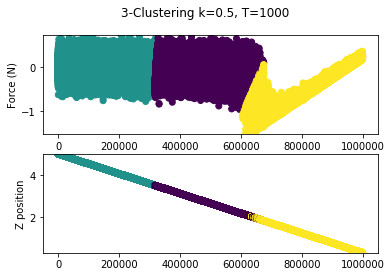

In [13]:
plt.figure(1)
plt.suptitle('3-Clustering k=0.5, T=1000')
plt.subplot(211)
plt.scatter(range(Xk.shape[0]), Xk[:,0], c=labels)
plt.ylim(min(Xk[:,0]),max(Xk[:,0]))
plt.ylabel('Force (N)')
plt.subplot(212)
plt.scatter(range(Xk.shape[0]), Xk[:,1], c=labels)
plt.ylim(min(Xk[:,1]),max(Xk[:,1]))
plt.ylabel('Z position')